# A model for predicting heart diesease trained using Tensorflow  

## Importing Libraries 

    ~ Tensorflow for training, estimating and outsourcing
    ~ Pandas for dataset managing 
    ~ numpy for array related stuffs
    ~ matplotlib for plotting dataset values
    

In [1]:
import time

start_time = time.time()

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

end_time = time.time()

print (end_time - start_time)

15.827080726623535


## Importing our datasaet
    ~ Our dataset is in csv format. So importing it as pandas dataframe

In [2]:
%%bash
ls

DNN Heart Disease Predictor.ipynb
heart.csv
Heart DIsease Prediction TF.ipynb
Model_dir


In [3]:
df = pd.read_csv('heart.csv')

## Exploring our dataset 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
pos = df[df.target == 1]
neg = df[df.target == 0]

## Visualizing the dataset 

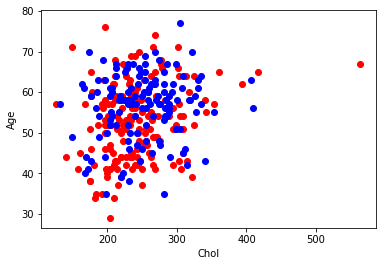

In [7]:
plt.scatter(pos.chol, pos.age, color = 'red')
plt.scatter(neg.chol, neg.age, color = 'blue')
plt.xlabel('Chol')
plt.ylabel('Age')
plt.show()

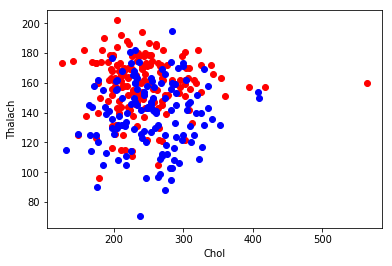

In [8]:
plt.scatter(pos.chol, pos.thalach, color = 'red')
plt.scatter(neg.chol, neg.thalach, color = 'blue')
plt.xlabel('Chol')
plt.ylabel('Thalach')
plt.show()

## Split the dataset into train and test dataset 

In [9]:
from sklearn.model_selection import train_test_split

df.sample(frac = 1).reset_index(drop = True)

label = df.target

features = df.drop('target', axis = 1)

features = (features - features.mean())/(features.max() - features.min())

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 101)

In [10]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Importing SVM 

In [11]:
from sklearn import svm

classifier = svm.SVC(gamma= 'scale')

In [12]:
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
print("Test accuracy {}".format(classifier.score(x_test, y_test) * 100))

Test accuracy 78.68852459016394


## Using Tensorflow 

### Creating Feature Columns 

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df = (df - df.min())/(df.max() - df.min())

In [17]:
age = tf.feature_column.numeric_column('age')

sex = tf.feature_column.numeric_column('sex')

cp = tf.feature_column.numeric_column('cp')

trestbps = tf.feature_column.numeric_column('trestbps')

chol = tf.feature_column.numeric_column('chol')

fbs = tf.feature_column.numeric_column('fbs')

restecg = tf.feature_column.numeric_column('restecg')

thalach = tf.feature_column.numeric_column('thalach')

exang = tf.feature_column.numeric_column('exang')

oldpeak = tf.feature_column.numeric_column('oldpeak')

slope = tf.feature_column.numeric_column('slope')

ca = tf.feature_column.numeric_column('ca')

thal = tf.feature_column.numeric_column('thal')

In [18]:
feature_column = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, thal]

### Splitting the dataset 

In [19]:
label = df.target

features = df.drop(columns= 'target')

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 101)

### Defining Input Functions 

In [21]:
input_fn = tf.estimator.inputs.pandas_input_fn(x= x_train,
                                               y = y_train,
                                               batch_size= 10,
                                               num_epochs= 1000,
                                               shuffle= True)

### Instantiating Classifier 

In [22]:
model_dir = 'Model_dir'

In [23]:
%%bash

rm -rf Model_dir

In [24]:
tf_classifier = tf.estimator.LinearClassifier(feature_columns= feature_column, model_dir= model_dir, n_classes= 2, optimizer= 'Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'Model_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1ef0c87be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
tf_classifier.train(input_fn= input_fn, steps = 1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into Model_dir/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 406.171
INFO:tensorflow:loss = 2.7405338, step = 101 (0.247 sec)
INFO:tensorflow:global_step/sec: 684.238
INFO:tensorflow:loss = 5.7329907, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 736.552
INFO:tensorflow:loss = 3.2478135, step = 301 (0.136 sec)
INFO:tensorflow:global_step/sec: 676.956
INFO:tensorflow:loss = 4.6735096, step = 401 (0.148 sec)
INFO:tensorf

### Input function for Testing 

In [26]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x = x_test, y= y_test, num_epochs=1, batch_size=10, shuffle= False)

In [27]:
train_spec = tf.estimator.TrainSpec(input_fn = input_fn, max_steps = 1000)

eval_spec = tf.estimator.EvalSpec(input_fn = eval_input_fn, steps = 100, start_delay_secs = 10)

In [28]:
tf.estimator.train_and_evaluate(tf_classifier, train_spec, eval_spec)

INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.
INFO:tensorflow:Skipping training since max_steps has already saved.


(None, None)

### DNN for better predictions 

In [30]:
model_dir = 'Model_dir'
nn = tf.estimator.DNNClassifier(hidden_units=[32, 16, 8, 4, 2], feature_columns= feature_column, model_dir= model_dir, n_classes= 2, dropout= 0.2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'Model_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1ef0c87f28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
shutil.rmtree(model_dir, ignore_errors= True)

nn.train(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into Model_dir/model.ckpt.
INFO:tensorflow:loss = 6.537509, step = 1
INFO:tensorflow:global_step/sec: 378.097
INFO:tensorflow:loss = 8.023225, step = 101 (0.266 sec)
INFO:tensorflow:global_step/sec: 592.433
INFO:tensorflow:loss = 5.4748616, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 622.965
INFO:tensorflow:loss = 7.067591, step = 301 (0.161 sec)
INFO:tensorflow:global_step/sec: 570.481
INFO:tensorflow:loss = 5.755484, step = 401 (0.176 sec)
INFO:tensorflow:global_step/sec: 491.045
INFO:tensorflow:loss = 4.435209, step = 501 (0.204 sec)
INFO:tensorflow:global_step/sec: 498.621
INFO:tensorflow:loss = 5.8498726, step = 601 (0.200 sec)
INFO:tensorflow:global_step/sec: 511.768
INFO:tensorflow:loss = 4.272

INFO:tensorflow:global_step/sec: 533.65
INFO:tensorflow:loss = 3.1780992, step = 8101 (0.187 sec)
INFO:tensorflow:global_step/sec: 524.444
INFO:tensorflow:loss = 3.8350022, step = 8201 (0.191 sec)
INFO:tensorflow:global_step/sec: 477.679
INFO:tensorflow:loss = 2.9709024, step = 8301 (0.210 sec)
INFO:tensorflow:global_step/sec: 435.308
INFO:tensorflow:loss = 3.553327, step = 8401 (0.229 sec)
INFO:tensorflow:global_step/sec: 466.33
INFO:tensorflow:loss = 2.2089787, step = 8501 (0.214 sec)
INFO:tensorflow:global_step/sec: 494.64
INFO:tensorflow:loss = 5.0999537, step = 8601 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.155
INFO:tensorflow:loss = 3.2743142, step = 8701 (0.206 sec)
INFO:tensorflow:global_step/sec: 468.186
INFO:tensorflow:loss = 2.3025057, step = 8801 (0.213 sec)
INFO:tensorflow:global_step/sec: 456.023
INFO:tensorflow:loss = 2.7767859, step = 8901 (0.221 sec)
INFO:tensorflow:global_step/sec: 518.295
INFO:tensorflow:loss = 3.4062881, step = 9001 (0.191 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 334.937
INFO:tensorflow:loss = 2.9584785, step = 16401 (0.297 sec)
INFO:tensorflow:global_step/sec: 292.805
INFO:tensorflow:loss = 1.302871, step = 16501 (0.340 sec)
INFO:tensorflow:global_step/sec: 298.615
INFO:tensorflow:loss = 3.8121285, step = 16601 (0.338 sec)
INFO:tensorflow:global_step/sec: 285.981
INFO:tensorflow:loss = 2.9766445, step = 16701 (0.346 sec)
INFO:tensorflow:global_step/sec: 431.96
INFO:tensorflow:loss = 6.694209, step = 16801 (0.231 sec)
INFO:tensorflow:global_step/sec: 451.787
INFO:tensorflow:loss = 1.0078914, step = 16901 (0.223 sec)
INFO:tensorflow:global_step/sec: 518.466
INFO:tensorflow:loss = 0.9455778, step = 17001 (0.192 sec)
INFO:tensorflow:global_step/sec: 505.774
INFO:tensorflow:loss = 1.966422, step = 17101 (0.198 sec)
INFO:tensorflow:global_step/sec: 446.977
INFO:tensorflow:loss = 5.9047365, step = 17201 (0.224 sec)
INFO:tensorflow:global_step/sec: 439.71
INFO:tensorflow:loss = 1.7722251, step = 17301 (0.228 sec)
INFO:

In [32]:
nn.evaluate(eval_input_fn, steps= 10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-24-16:58:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from Model_dir/model.ckpt-24200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Finished evaluation at 2019-04-24-16:58:32
INFO:tensorflow:Saving dict for global step 24200: accuracy = 0.75409836, accuracy_baseline = 0.5081967, auc = 0.8069892, auc_precision_recall = 0.83610046, average_loss = 2.796353, global_step = 24200, label/mean = 0.4918033, loss = 24.368221, precision = 0.7777778, prediction/mean = 0.53563595, recall = 0.7
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24200:

{'accuracy': 0.75409836,
 'accuracy_baseline': 0.5081967,
 'auc': 0.8069892,
 'auc_precision_recall': 0.83610046,
 'average_loss': 2.796353,
 'label/mean': 0.4918033,
 'loss': 24.368221,
 'precision': 0.7777778,
 'prediction/mean': 0.53563595,
 'recall': 0.7,
 'global_step': 24200}